## Task 1

На основі зібраних даних було побудовано модель, яка описує кількість активних сесій:

$f(t) = 1000t \cdot e^{-0.2t}$

- $t$ — час у годинах від початку робочого дня (8:00), 
- $f(t)$ — кількість одночасно активних сесій.

**1. Аналітичне диференціювання $(uv)' = u'v + uv'$**

$f'(t) = 1000 \cdot e^{-0.2t} + 1000t \cdot (-0.2 \cdot e^{-0.2t})$

$f'(t) = 1000 \cdot e^{-0.2t} - 200t \cdot e^{-0.2t}$

$f'(t) = 200\cdot e^{-0.2t}(5 - t) => t = 5$

**2. Визначення пікового навантаження: $f'(t) = 0$**

$f'(t) = 200\cdot e^{-0.2t}(5 - t) = 0$

Оскільки експонента $e^{-0.2t}$ завжди додатна і $e^{-0.2t} \neq 0$, то нулю має дорівнювати множник у дужках:

$5 - t = 0 => t = 5$

Розрахунок реального часу: ($t=0$) — це 8:00.

$8:00 + 5 год = 13:00$


**Висновки:**

- *Що означає додатне значення похідної о 10:00 для IT-відділу?*

O 10:00 швидкість активно зростає (+402), це означає що користувачі активно підʼєднуються та варто починати вмикати додаткові ресурси

- *Що означає від'ємне значення похідної о 18:00?*

О 18:00 активність спадає (-135), навантаження спадає та додаткові ресурси можна відключати.

- *О котрій годині варто мати максимальну кількість серверів у роботі?*

Масимальне навантаження відбувається о 13:00, це пік активності (похідна дорівнює 0).

In [18]:
import numpy as np
from scipy.optimize import approx_fprime

# Original function
def f(t_arr):
    t = t_arr[0]
    return 1000 * t * np.exp(-0.2 * t)

# Derivative
def analytical_derivative(t):
    return 200 * np.exp(-0.2 * t) * (5 - t)


# Sheet header
print(f"{'t':<10} | {'Analytical':<15} | {'Scipy(approx)':<15} | {'Abs':<10}")
print("-" * 60)

check_points = [2, 6, 10]

for t in check_points:
    # analytical
    exact = analytical_derivative(t)

    #  scipy
    approx = approx_fprime([t], f, epsilon=1e-5)[0]

    print(f"{t:<10} | {exact:<15.4f} | {approx:<15.4f} | {abs(exact - approx):.6f}")

t          | Analytical      | Scipy(approx)   | Abs       
------------------------------------------------------------
2          | 402.1920        | 402.1910        | 0.001073
6          | -60.2388        | -60.2391        | 0.000241
10         | -135.3353       | -135.3353       | 0.000000


## Task 2

Педагогічні дослідження показують, що швидкість навчання пропорційна кількості ще не засвоєного матеріалу.

Цю залежність описує наступне диференціальне рівняння:

$\frac{dK}{dt}$ $= {r(M−K)}$

де:

- $K(t)$ — рівень знань студента в момент часу 
- $t$ (у відсотках, від 0 до 100)
- $M=100$ — максимальний рівень знань (100%)
- $r=0.15$ — коефіцієнт швидкості навчання (1/день)

Початкова умова: 
- $K(0)=10$ (студент починає з 10% базових знань)

*Висновки:*

Різниця в старті між (5%) і (20%) велика - у 4 рази. Проте різниця у часі навчання складає всього 1.1 дня (15.05 - 13.95). Рівняння означає, що швидкість навчання залежить від того, скільки залишилося вивчити. На початку всі вчать матеріал дуже швидко, бо база $(100 - K)$ велика. Студент з 5% дуже швидко наздоганяє студента з 20%. Основний час витрачається у кінці (з 80% до 90%), коли швидкість падає. Цей повільний фініш майже однаковий для всіх. Отже, початковий рівень знань не є критичним фактором для загального часу навчання. 

Початковий рівень знань(%) | Час досягнення 90% (дні)
-------------------------------------------------------
5                         | 15.05
10                        | 14.65
20                        | 13.95


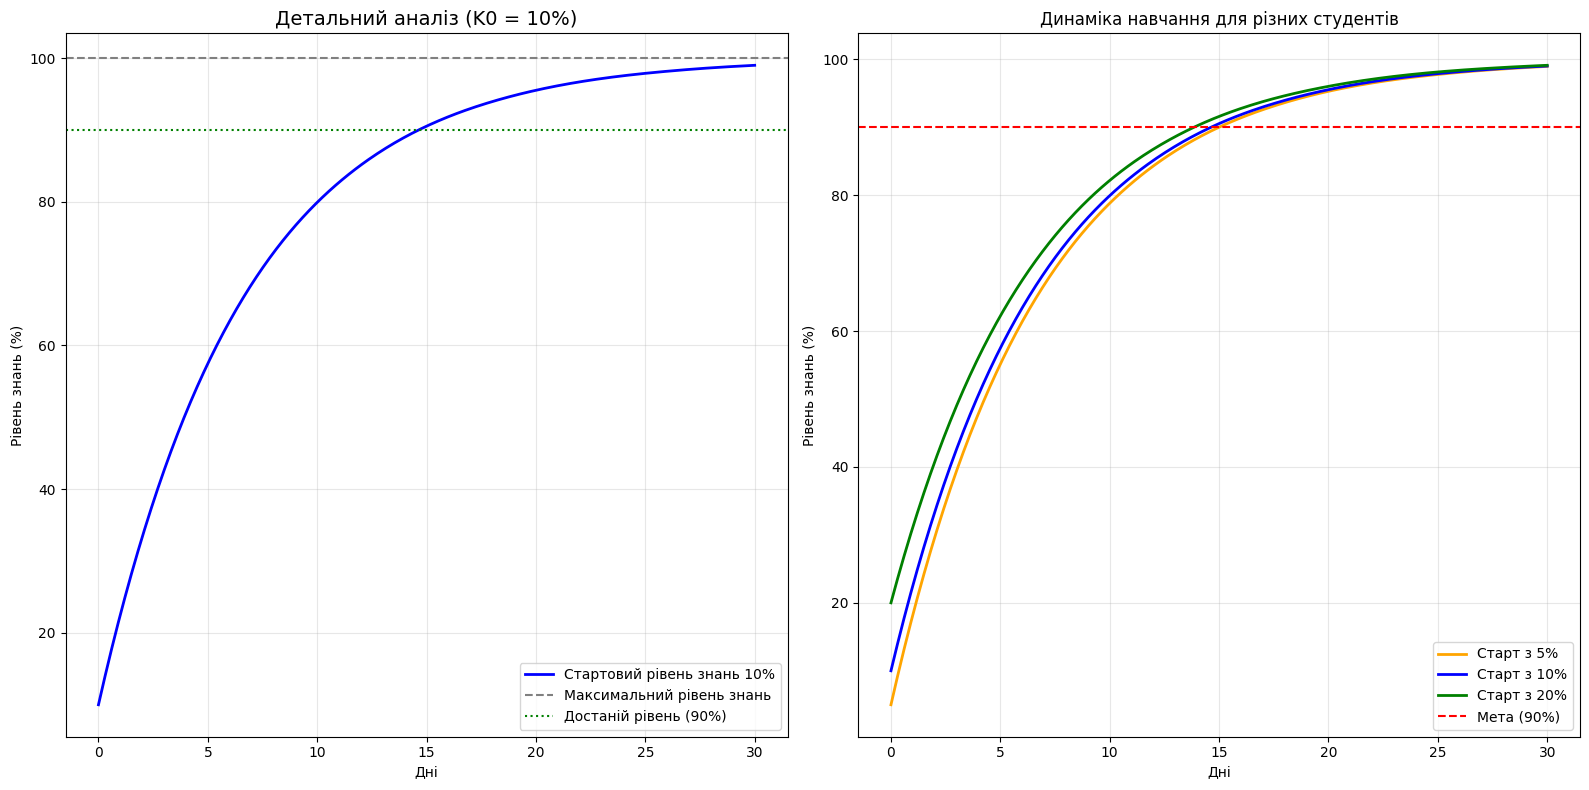

In [12]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Params
M = 100
r = 0.15
t_span = (0, 30)
K0 = 10


# Differential Equation
def learning_rate(t, K):
    return r * (M - K)


#  Fihure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Basic scenario (K0 = 10)
solution = solve_ivp(learning_rate, t_span, [K0], dense_output=True)
days = np.linspace(0, 30, 300)
knowledge_level = solution.sol(days)[0]

# Plot
ax1.plot(days, knowledge_level, "b-", linewidth=2, label="Cтартовий рівень знань 10%")
ax1.axhline(y=M, color="gray", linestyle="--", label=f"Mаксимальний рівень знань")
ax1.axhline(y=90, color="green", linestyle=":", label="Достаній рівень (90%)")
ax1.set_title("Детальний аналіз (K0 = 10%)", fontsize=14)
ax1.set_xlabel("Дні")
ax1.set_ylabel("Рівень знань (%)")
ax1.grid(True, alpha=0.3)
ax1.legend()


# Comparison
initial_conditions = [5, 10, 20]
colors = ["orange", "blue", "green"]

print(f"{'Початковий рівень знань(%)':<25} | {'Час досягнення 90% (дні)'}")
print("-" * 55)

for K_0, color in zip(initial_conditions, colors):
    # Solve for each student
    solution = solve_ivp(learning_rate, t_span, [K_0], dense_output=True)
    knowledge = solution.sol(days)[0]

    ax2.plot(days, knowledge, linewidth=2, color=color, label=f"Старт з {K_0}%")

    idx_90 = np.argmax(knowledge >= 90)  # first index where >= 90
    day_90 = days[idx_90]

    print(f"{K_0:<25} | {day_90:.2f}")


ax2.axhline(y=90, color="red", linestyle="--", label="Мета (90%)")
ax2.set_xlabel("Дні")
ax2.set_ylabel("Рівень знань (%)")
ax2.set_title("Динаміка навчання для різних студентів")
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

# Task 3

На основі даних попередніх запусків встановлено, що інтенсивність реєстрацій (кількість нових реєстрацій за день) описується функцією:

$f(t)=500⋅e^{−0.3t}$

1. кількість реєстрацій за перші 7 днів.

$F(t) = 500 \cdot \frac{1}{-0.3} \cdot e^{-0.3t} = -\frac{500}{0.3} e^{-0.3t} = -\frac{5000}{3} e^{-0.3t}$

$\int_0^7 f(t)dt = F(7) - F(0)$

$F(7) = -1666.67 \cdot e^{-0.3 \cdot 7} = -1666.67 \cdot e^{-2.1} = -204.095$

$F(0) = -1666.67 \cdot e^{0} = -1666.67 \cdot 1 = -1666.67$

$F(7) - F(0) \approx 1462$

3. Теоретичний максимум ($t \to \infty$)

$\int_0^\infty f(t)dt = F(\infty) - F(0) = 0 - (-1666.67) = 1666.67$

*Висновок:* Розрахунки показали, що за перші 7 днів кампанія залучила 1462 користувачі, що становить 87.75% від теоретичного максимуму (1667).

In [13]:
import numpy as np
from scipy.integrate import quad


# f(t)
def f(t):
    return 500 * np.exp(-0.3 * t)

# Analytical
F_7 = -(5000 / 3) * np.exp(-0.3 * 7)
F_0 = -(5000 / 3) * np.exp(-0.3 * 0)

analyt_week1 = F_7 - F_0

# Numerical
numerical_week1, error = quad(f, 0, 7)

print(f"Analytical: {analyt_week1:.2f} users")
print(f"Numerical: {numerical_week1:.2f} users")
print(f"Difference: {abs(analyt_week1 - numerical_week1):.10f}")

#  Maximum and effficiency
theor_max = 0 - F_0

efficiency = (analyt_week1 / theor_max) * 100

print(f"Theoretical Max: {theor_max:.2f} users")
print(f"Efficiency: {efficiency:.2f}%")

Analytical: 1462.57 users
Numerical: 1462.57 users
Difference: 0.0000000000
Theoretical Max: 1666.67 users
Efficiency: 87.75%


# Task 4 

Дано функцію двох змінних:


$f(x,y)=0.5x^2 +0.3y^2+0.2xy+10x+5y$

1. Частинні похідні аналітично:

$\frac{∂f}{∂x} = 2 \cdot 0.5x + 0 + 0.2y + 10 + 0 = x + 0.2y + 10$

$\frac{∂f}{∂y} = 0 + 2 \cdot 0.3y + 0.2x + 0 + 5 = 0.6y + 0.2x + 5$

3. Градієнт в точці $(x,y)=(10,20)$

$\frac{∂f}{∂x} = 10 + 0.2 \cdot 20 + 10 = 24$

$\frac{∂f}{∂y} = 0.6 \cdot 20 + 0.2 \cdot 10 + 5 = 19$

$∇f = (24,19)$


In [11]:
import numpy as np
from scipy.optimize import approx_fprime


# f(x, y)
def f(coords):
    x, y = coords
    return 0.5 * x**2 + 0.3 * y**2 + 0.2 * x * y + 10 * x + 5 * y


# Point
point = np.array([10, 20])

# Analytical gradient
df_dx = point[0] + 0.2 * point[1] + 10
df_dy = 0.6 * point[1] + 0.2 * point[0] + 5


gradient = approx_fprime(point, f, epsilon=1e-8)

print(f"∇f = ({gradient[0]:.6f}, {gradient[1]:.6f})")
print(f"ABS: {abs(df_dx - gradient[0]):.6f}, {abs(df_dy - gradient[1]):.6f}")

# Linear Approximation
dx = 0.5
dy = -0.3
approx_change = df_dx * dx + df_dy * dy

# Exact change
new_point = np.array([10.5, 19.7])

f_old = f(point)
f_new = f(new_point)
exact_change = f_new - f_old


print(f"Approximation: {approx_change:.4f}")
print(f"Exact: {exact_change:.4f}")
print(f"Error: {abs(approx_change - exact_change):.4f}")

∇f = (24.000000, 19.000002)
ABS: 0.000000, 0.000002
Approximation: 6.3000
Exact: 6.4220
Error: 0.1220
